<a href="https://colab.research.google.com/github/mehrdadkazemi254/Neural_Network_From_Scratch/blob/main/Model_Spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from data import create_dataset, plot_contour

class NeuralNetwork():
    def __init__(self, X, y):
        #m training samples, n features
        self.m, self.n = X.shape
        self.lambd = 1e-3
        self.learning_rate = 0.1

        #define the size of Neural Network
        self.h1 = 25      #h1:hidden layer 1
        self.h2 = len(np.unique(y))

    def init_kaiming_weights(self, l0, l1):
        #l0: the number of nodes it is coming from
        #l1: the number of nodes it is going to
        #kaiming init
        w = np.random.randn(l0, l1) * np.sqrt(2.0 / 10)
        b = np.zeros((1, l1))
        return w, b

    def forward_prop(self, X, parameters): #parameters is a dictionary that stores all the necessary weights and biases
        W2 = parameters['W2']  #from the hidden layer 1 to 2
        W1 = parameters['W1']  #from the input to the hidden layer 1
        b1 = parameters['b1']
        b2 = parameters['b2']

        #forward prop
        a0 = X
        z1 = np.dot(a0, W1) + b1
        a1 = np.maximum(0, z1) #ReLU activation function
        z2 = np.dot(a1, W2) + b2

        #softmax
        scores = z2
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        cache = {'a0': X, 'probs': probs, 'a1': a1}
        return cache, probs

    def compute_cost(self, y, probs, parameters): #cross entropy loss
        W1 = parameters['W1']
        W2 = parameters['W2']

        data_loss = np.sum(-np.log(probs[np.arange(self.m), y]) / self.m)
        reg_loss = 0.5 * self.lambd * np.sum(W1 * W1) + 0.5 * self.lambd * np.sum(W2 * W2)
        total_cost = data_loss + reg_loss

        return total_cost

    def back_prop(self, cache, parameters, y):
        #unpack parameters
        W2 = parameters['W2']
        W1 = parameters['W1']
        b1 = parameters['b1']
        b2 = parameters['b2']

        #unpack from forward prop
        a0 = cache['a0']
        a1 = cache['a1']
        probs = cache['probs']

        #we want dW1, dW2, db1, db2
        dz2 = probs
        dz2[np.arange(self.m), y] -= 1
        dz2 /= self.m

        #backprop to dW2, db2
        dW2 = np.dot(a1.T, dz2) + self.lambd * W2
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, W2.T)
        dz1 = dz1 * (a1 > 0)

        dW1 = np.dot(a0.T, dz1) + self.lambd * W1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        grads = {'dW1': dW1, 'dW2': dW2, 'db1': db1, 'db2': db2}

        return grads

    def update_parameters(self, parameters, grads):
        #gradient descent step
        W2 = parameters['W2']
        W1 = parameters['W1']
        b1 = parameters['b1']
        b2 = parameters['b2']

        dW1 = grads['dW1']
        dW2 = grads['dW2']
        db1 = grads['db1']
        db2 = grads['db2']

        W2 -= self.learning_rate * dW2
        W1 -= self.learning_rate * dW1
        b2 -= self.learning_rate * db2
        b1 -= self.learning_rate * db1

        parameters = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
        return parameters

    def main(self, X, y, num_iter=10000):
        W1, b1 = self.init_kaiming_weights(self.n, self.h1)
        W2, b2 = self.init_kaiming_weights(self.h1, self.h2)

        parameters = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

        for it in range(num_iter + 1):
            #forward prop
            cache, probs = self.forward_prop(X, parameters)

            #calculate cost
            cost = self.compute_cost(y, probs, parameters)

            if it % 2500 == 0:
                print(f"At iteration {it}, we have a Loss of {cost}")

            grads = self.back_prop(cache, parameters, y)

            #update parameters
            parameters = self.update_parameters(parameters, grads)

        return parameters

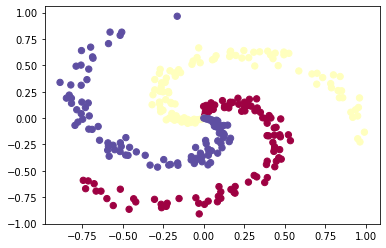

At iteration 0, we have a Loss of 1.5180459032718558
At iteration 2500, we have a Loss of 0.3142109828001198
At iteration 5000, we have a Loss of 0.26964008487985647
At iteration 7500, we have a Loss of 0.25620116450060504
At iteration 10000, we have a Loss of 0.2498846526036747


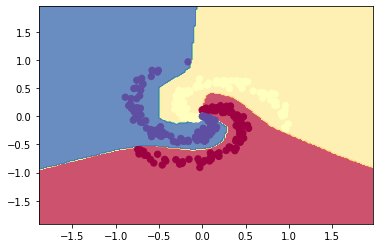

In [2]:
if __name__ == '__main__':
    X, y = create_dataset(100, 3)
    y =y.astype(int)

    NN = NeuralNetwork(X, y)
    trained_parameters = NN.main(X, y)

    plot_contour(X, y, NN, trained_parameters)